In [1]:
#!/usr/bin/env python
# coding: utf-8

from mpi4py import MPI
import matplotlib.pyplot as plt
import numpy as np


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

def bifr(r, n, m):
    x = np.random.rand()
    X = []
    for i in range(n):
        x = r * x * (1 - x)
        X.append(x)
    return X[n-m : n-1]


m = 200
Range = 1000
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, size)]

R = np.linspace(0.1, 4, 1000)

if rank == 0:
    r_list = np.array_split(R, size)
    splited_data = r_list
else:
    r_list = None

r_list = comm.scatter(r_list, 0)

if rank == 0:
    start_time = MPI.Wtime()

X = []
for r in r_list:
    x = bifr(r, Range, m)
    X.append(x)

comm.Barrier() 

if rank == 0:
    end_time = MPI.Wtime()

X = comm.gather(X, root=0)

if rank == 0:
    plt.figure(figsize = (16,9))
    k = 0
    for i in range(len(X)):
        for j in range(len(X[i])):
            plt.scatter(R[k]*np.ones(len(X[i][j])), X[i][j])
            k += 1
    plt.title('Bifurcation map')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.show() 
    #plt.close()

    print(end_time - start_time)

<Figure size 1600x900 with 1 Axes>

0.4026189460000751


In [2]:
l = []
with open('time_new.txt') as f:
    l = f.read().splitlines()
result = [float(l[0])/float(i) for i in l]

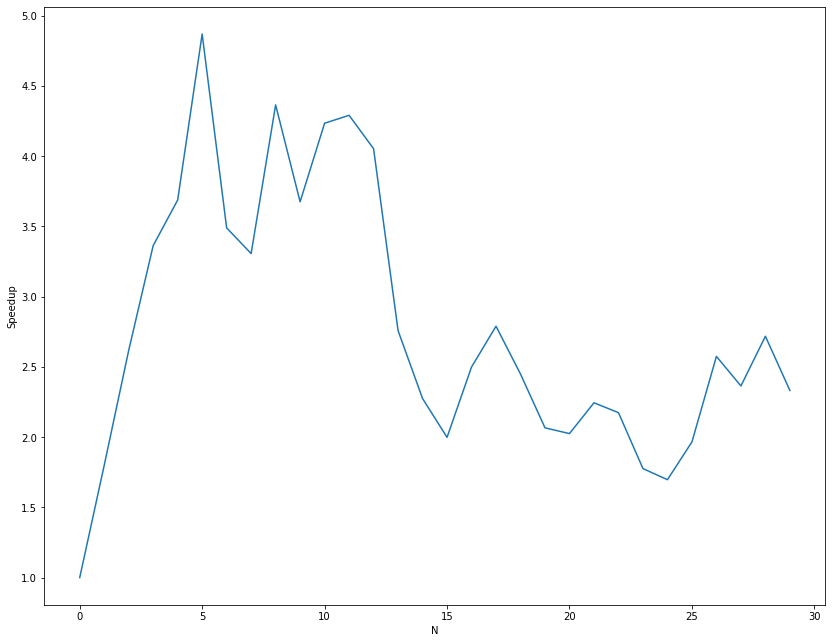

In [7]:
%matplotlib inline
plt.figure(figsize = (14,11))
plt.plot(range(len(result)),result)
plt.ylabel('Speedup')
plt.xlabel('N')
plt.show()

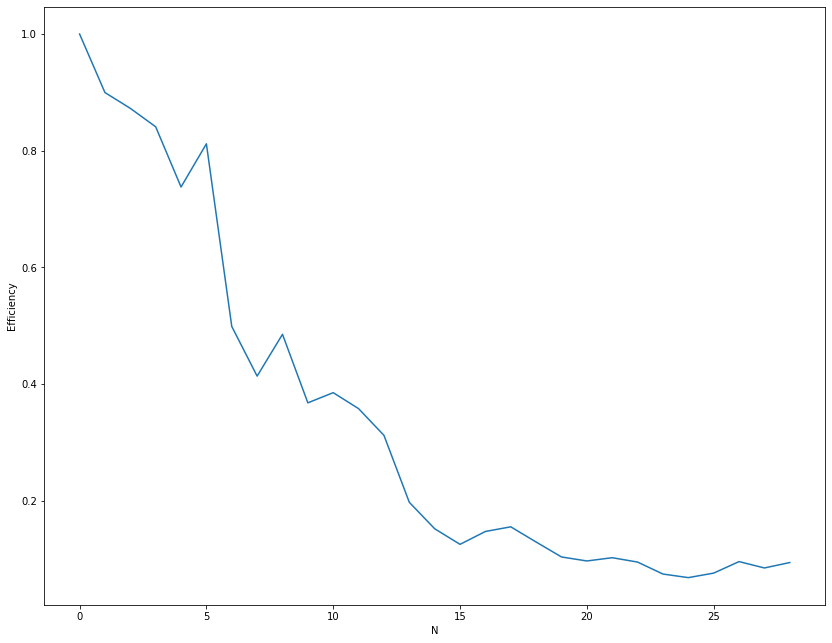

In [8]:
ef = [result[i]/(i+1) for i in range(len(result)-1)]
plt.figure(figsize = (14,11))
plt.plot(range(len(ef)),ef)
plt.ylabel('Efficiency')
plt.xlabel('N')
plt.show()